In [1]:
import numpy as np
import cv2 as cv2 # opencv computer vision library
from skimage import io # for io.imread
from google.colab.patches import cv2_imshow # for image display in the notebook


NOT WORKING WELL IN OUR CASE 

In [2]:

def remove_noise(gray, num):
    Y, X = gray.shape
    nearest_neigbours = [[
        np.argmax(
            np.bincount(
                gray[max(i - num, 0):min(i + num, Y), max(j - num, 0):min(j + num, X)].ravel()))
        for j in range(X)] for i in range(Y)]
    result = np.array(nearest_neigbours, dtype=np.uint8)
    cv2.imwrite('result2.jpg', result)
    return result

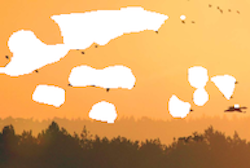

In [3]:
#img = cv2.imread('/birds_edit.png')
imageBGR = io.imread( 'birds_edit.png' ) 
imageRGB = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2RGB )
cv2_imshow(imageRGB)
img = imageRGB

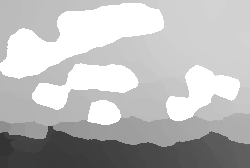

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_img = remove_noise(gray, 10)
cv2_imshow(output_img)

USE THAT METHOD

In [ ]:
!pip install opencv-contrib-python==4.2.0.34

In [35]:
#https://towardsdatascience.com/image-inpainting-with-a-single-line-of-code-c0eef715dfe2

#distorted_img: The image on which inpainting has to be done.
#mask: Black mask with white pixels to be inpainted
distorted_img = cv2.imread( 'birds_edit.png' ) 
#distorted_img = cv2.resize(distorted_img, None, fx=0.25, fy=0.25)
mask = cv2.imread('birds_edit_mask.png', 0)
mask = cv2.resize(mask, (distorted_img.shape[1], distorted_img.shape[0]))
'''
res_NS = cv2.inpaint(distorted_img, mask, 3, cv2.INPAINT_NS)
res_TELEA = cv2.inpaint(distorted_img, mask, 3, cv2.INPAINT_TELEA)
res_FSRFAST = distorted_img.copy()
res_FSRBEST = distorted_img.copy()
mask1 = cv2.bitwise_not(mask)
'''
output1 = cv2.inpaint(distorted_img, mask, 3, cv2.INPAINT_NS)
output2 = cv2.inpaint(distorted_img, mask, 3, cv2.INPAINT_TELEA)

#cv2.xphoto.inpaint(distorted_img, mask1, res_FSRFAST, cv2.xphoto.INPAINT_FSR_FAST)
#cv2.xphoto.inpaint(distorted_img, mask1, res_FSRBEST, cv2.xphoto.INPAINT_FSR_BEST)

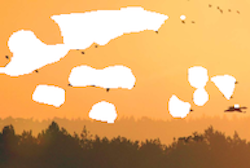

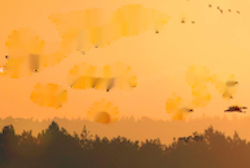

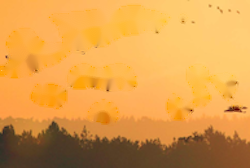

In [36]:
cv2_imshow(distorted_img)
cv2_imshow(output1)
cv2_imshow(output2)

In [34]:
cv2.imwrite('dummy_colouring_birds.png', output1)

True